In [7]:
import pandas as pd
import os
import ast

In [9]:
def load(filepath):

    filename = os.path.basename(filepath)

    if 'features' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'echonest' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'genres' in filename:
        return pd.read_csv(filepath, index_col=0)

    if 'tracks' in filename:
        tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])

        COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'),
                   ('track', 'genres'), ('track', 'genres_all')]
        for column in COLUMNS:
            tracks[column] = tracks[column].map(ast.literal_eval)

        COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
                   ('album', 'date_created'), ('album', 'date_released'),
                   ('artist', 'date_created'), ('artist', 'active_year_begin'),
                   ('artist', 'active_year_end')]
        for column in COLUMNS:
            tracks[column] = pd.to_datetime(tracks[column])

        SUBSETS = ('small', 'medium', 'large')
        try:
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                    'category', categories=SUBSETS, ordered=True)
        except (ValueError, TypeError):
            # the categories and ordered arguments were removed in pandas 0.25
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                     pd.CategoricalDtype(categories=SUBSETS, ordered=True))

        COLUMNS = [('track', 'genre_top'), ('track', 'license'),
                   ('album', 'type'), ('album', 'information'),
                   ('artist', 'bio')]
        for column in COLUMNS:
            tracks[column] = tracks[column].astype('category')

        return tracks


In [11]:
tracks = load("../../../fma_metadata/tracks.csv")

In [12]:
tracks['artist','location'].head()

track_id
2             New Jersey
3             New Jersey
5             New Jersey
10                   NaN
20    Colchester England
Name: (artist, location), dtype: object

In [13]:
tracks.columns

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [14]:
classified_genre = pd.read_csv("base_data_prob_overfitting_logistic.csv",index_col=[0])

In [15]:
classified_genre

,Rock,Electronic,Pop,Hip-Hop,Folk
track_id,,,,,
2,0.312761,0.332441,0.126890,0.193236,0.034672
3,0.102087,0.393448,0.105095,0.376399,0.022972
5,0.126879,0.570332,0.095814,0.151391,0.055583
10,0.811296,0.076041,0.056182,0.036434,0.020047
134,0.358865,0.311135,0.122190,0.151563,0.056246
...,...,...,...,...,...
155315,0.817689,0.079424,0.035178,0.023874,0.043835
155316,0.841658,0.046124,0.028354,0.024504,0.059359
155317,0.385068,0.293408,0.121164,0.077576,0.122784


In [21]:
X_features_all = pd.read_csv("../Experiment Data/X_features_all.csv",header=[0,1,2],index_col=[0])

In [23]:
X_features_all

chroma_cens                                                    \
            kurtosis                                                     
                  01        02        03        04        05        06   
track_id                                                                 
2           7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3           1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5           0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10          3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20         -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   
...              ...       ...       ...       ...       ...       ...   
155315     -0.319850  0.653044  1.300360 -0.606061 -1.109302 -1.006683   
155316     -0.490129  0.463834  2.321970 -0.084352  1.662914  2.115189   
155317     -0.461559 -0.229601 -0.496632 -0.422033  0.130612 -0.263825   
155318      0.552473 -0.110498 -0.532014  0.263131 -0.224011 -0.530972   
155319     -0.176901  0.187208 -0.050664  0.368843  0.066005 -0.857354   

                                                  ...  mel_spec            \
                                                  ...       std             
                07        08        09        10  ...        90        91   
track_id                                          ...                       
2         1.481593  2.691455  0.866868  1.341231  ...  0.005500  0.004066   
3         1.366848  1.054094  0.108103  0.619185  ...  0.014708  0.019320   
5        -0.923192 -0.927232  0.666617  1.038546  ...  0.000010  0.000009   
10        1.770694  1.604566  0.521217  1.982386  ...  0.018939  0.015547   
20       -0.289294 -0.816410  0.043851 -0.804761  ...  0.008917  0.008339   
...            ...       ...       ...       ...  ...       ...       ...   
155315    0.059643  0.472580 -0.856436 -0.524676  ...  0.000922  0.000430   
155316   -0.237794  5.695442  0.830353  1.951819  ...  0.001007  0.000663   
155317   -0.628103 -0.082687 -0.229483 -0.492753  ...  0.002338  0.001594   
155318    1.713526  1.418444  1.325197  0.120333  ...  0.003115  0.002223   
155319   -0.780860  0.626281 -0.630938 -0.787229  ...  0.002461  0.001665   

                                                                      \
                                                                       
                92        93        94        95        96        97   
track_id                                                               
2         0.003965  0.002347  0.001663  0.002632  0.001452  0.000114   
3         0.078528  0.072792  0.069122  0.013616  0.008447  0.001303   
5         0.000008  0.000006  0.000005  0.000007  0.000004  0.000002   
10        0.010535  0.006567  0.006368  0.003965  0.003788  0.002343   
20        0.006849  0.006172  0.005579  0.004760  0.004246  0.004115   
...            ...       ...       ...       ...       ...       ...   
155315    0.000138  0.000019  0.000003  0.000004  0.000004  0.000003   
155316    0.000429  0.000345  0.000208  0.000123  0.000121  0.000038   
155317    0.001051  0.000818  0.000603  0.000557  0.000391  0.000214   
155318    0.001846  0.001351  0.000899  0.000688  0.000458  0.000194   
155319    0.001135  0.000730  0.000473  0.000313  0.000198  0.000103   

                              
                              
                98        99  
track_id                      
2         0.000002  0.000002  
3         0.000003  0.000002  
5         0.000002  0.000001  
10        0.001213  0.000316  
20        0.003781  0.003704  
...            ...       ...  
155315    0.000003  0.000002  
155316    0.000002  0.000001  
155317    0.000067  0.000098  
155318    0.000042  0.000019  
155319    0.000006  0.000005  

[63934 rows x 1414 columns]

In [25]:
# top2 = classified_genre.apply(lambda row: row.nlargest(2).index, axis=1)

# # Now create a boolean DataFrame
# top2_classified_genre = pd.DataFrame(0, index=classified_genre.index, columns=classified_genre.columns)

# for i in classified_genre.index:
#     top2_classified_genre.loc[i, top2.loc[i]] = 1

In [27]:
track_recommendation_data = pd.DataFrame(tracks[tracks['track','genre_top'].isin(classified_genre.columns)]['track'][["interest","favorites","listens"]])

In [29]:
# ['track'][["interest","favorites","listens"]

In [31]:
track_recommendation_data

,interest,favorites,listens
track_id,,,
2,4656,2,1293
3,1470,1,514
5,1933,6,1151
10,54881,178,50135
134,1126,3,943
...,...,...,...
155315,153,1,128
155316,122,1,102
155317,194,1,165


In [33]:
# track_recommendation_data_bool = pd.DataFrame(index=track_recommendation_data.index,columns = track_recommendation_data.columns)
# for col in track_recommendation_data.columns:
#     track_recommendation_data_bool[col] = track_recommendation_data[col].map(lambda x: 1 if x>=track_recommendation_data[col].mean() else 0)

In [35]:
# track_recommendation_data_bool


In [37]:
recommendation_data = classified_genre.merge(track_recommendation_data,left_index=True,right_index=True)

In [39]:
recommendation_data

,Rock,Electronic,Pop,Hip-Hop,Folk,interest,favorites,listens
track_id,,,,,,,,
2,0.312761,0.332441,0.126890,0.193236,0.034672,4656,2,1293
3,0.102087,0.393448,0.105095,0.376399,0.022972,1470,1,514
5,0.126879,0.570332,0.095814,0.151391,0.055583,1933,6,1151
10,0.811296,0.076041,0.056182,0.036434,0.020047,54881,178,50135
134,0.358865,0.311135,0.122190,0.151563,0.056246,1126,3,943
...,...,...,...,...,...,...,...,...
155315,0.817689,0.079424,0.035178,0.023874,0.043835,153,1,128
155316,0.841658,0.046124,0.028354,0.024504,0.059359,122,1,102
155317,0.385068,0.293408,0.121164,0.077576,0.122784,194,1,165


In [42]:
recommendation_data.isna().sum()

Rock          0
Electronic    0
Pop           0
Hip-Hop       0
Folk          0
interest      0
favorites     0
listens       0
dtype: int64

In [46]:
recommendation_data.to_csv("base_recommendation_data_logistic.csv")

In [94]:
central_cee_hiphop_prob = pd.read_csv("central_cee_hiphop_prob.csv",index_col=[0])

In [198]:
central_cee_hiphop_prob

,0,1,2,3,4
0,0.290036,0.257069,0.125539,0.194336,0.13302


In [249]:
interaction_score = recommendation_data["listens"] + recommendation_data["favorites"] + recommendation_data["interest"]

In [251]:
interaction_score

track_id
2           5951
3           1985
5           3090
10        105194
134         2072
           ...  
155315       282
155316       225
155317       360
155318       384
155319       630
Length: 32241, dtype: int64

In [253]:
classified_genre.shape

(32241, 5)

In [255]:
from sklearn.metrics.pairwise import cosine_similarity

# genre_columns=["Rock","Electronic","Pop","Hip-Hop","Folk"]
new_song_similarities = cosine_similarity(central_cee_hiphop_prob,classified_genre)

In [257]:
new_song_similarities

array([[0.42019156, 0.42297824, 0.42277463, ..., 0.62278147, 0.61677644,
        0.61882866]])

In [259]:
pd.DataFrame(new_song_similarities)

,0,1,2,3,4,5,6,7,8,9,...,32231,32232,32233,32234,32235,32236,32237,32238,32239,32240
0,0.420192,0.422978,0.422775,0.627062,0.425756,0.617868,0.664411,0.383963,0.728488,0.299979,...,0.367405,0.319712,0.431978,0.337079,0.617152,0.617951,0.61657,0.622781,0.616776,0.618829


In [261]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
interaction_scores_norm = scaler.fit_transform(pd.DataFrame(interaction_score))


In [263]:
interaction_scores_norm

array([[1.54600740e-03],
       [5.12730462e-04],
       [8.00620279e-04],
       ...,
       [8.93630835e-05],
       [9.56158940e-05],
       [1.59707202e-04]])

In [265]:
final_scores = (0.7 * new_song_similarities
                + 0.3 * interaction_scores_norm)

In [266]:
# top_indices = new_song_similarities[0].argsort()[-5:][::-1]
# recommendations = X_features_all.iloc[top_indices]

In [267]:
# np.argsort(new_song_similarities)[::-1][:10]

In [271]:
# interaction_score

In [273]:
# np.argsort(new_song_similarities)[::-1][0][:10].shape

In [275]:
import numpy as np

def mean_score_top_n(similarity_scores, interactions, N=10):
    top_indices = np.argsort(new_song_similarities)[::-1][0][:10]
    return pd.DataFrame(interactions).iloc[top_indices].mean()

mean_score_model1 = mean_score_top_n(new_song_similarities, interaction_score)
# mean_score_model2 = mean_score_top_n(sim2, weighted_interactions)


In [277]:
mean_score_model1

0    1520.2
dtype: float64

<Axes: ylabel='Count'>

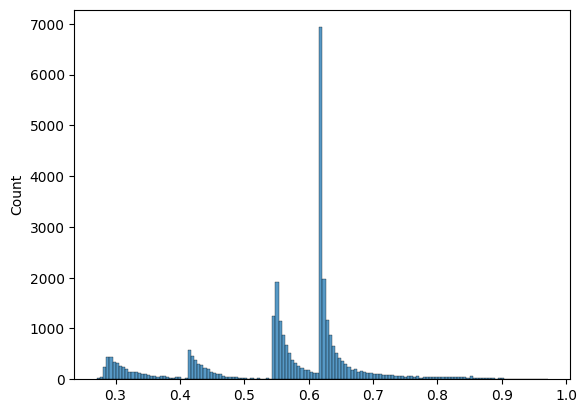

In [141]:
import seaborn as sns
sns.histplot(new_song_similarities.flatten())

In [317]:
recommendations.index

Index([33690, 73539, 88090, 88047, 84520], dtype='int64', name='track_id')

In [319]:
tracks['track'].loc[recommendations.index]

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
33690,320000,0,NaN,2010-08-05 14:43:26,NaT,5,0,NaN,"[15, 27, 183]","[183, 27, 12, 15]",NaN,2476,NaN,Attribution-NonCommercial-ShareAlike 3.0 Inter...,440,NaN,5,NaN,[],fortloop
73539,73324,0,NaN,2012-12-06 21:17:00,NaT,353,3,NaN,"[27, 94, 107]","[107, 12, 17, 1235, 27, 94]",NaN,25340,NaN,Attribution-Noncommercial-Share Alike 3.0 Unit...,24004,NaN,5,NaN,[],autiste de tourisme
88090,242920,0,NaN,2013-08-04 10:33:06,NaT,1,1,NaN,"[17, 362, 440]","[362, 10, 12, 17, 440]",NaN,1411,NaN,Attribution-Noncommercial-Share Alike 3.0 Unit...,856,NaN,17,NaN,[],M.R.T.G.B.P.S.D.T.V.N.C.
88047,247912,0,NaN,2013-08-04 09:53:16,NaT,1,0,NaN,"[17, 362, 440]","[362, 10, 12, 17, 440]",NaN,6164,NaN,Attribution-Noncommercial-Share Alike 3.0 Unit...,5036,NaN,18,NaN,[],C'est bientôt noël ou quoi ?
84520,320000,0,NaN,2013-05-21 13:48:27,NaT,131,3,Hip-Hop,[21],[21],NaN,1223,NaN,Attribution-NonCommercial-NoDerivatives (aka M...,961,NaN,6,NaN,[],Slow Head B4 Bed


In [321]:
tracks['artist'].loc[recommendations.index]

,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
33690,NaT,NaT,NaN,<p>Brooklyn based producer of lo-fi ship shape...,0,2010-08-05 14:43:46,12,8345,40.714353,New York,-74.005973,NaN,Don Trust,NaN,[don trust],http://dontrust.bandcamp.com/,NaN
73539,NaT,NaT,NaN,NaN,0,2012-12-06 21:18:11,0,14960,NaN,NaN,NaN,NaN,Vespre,NaN,[vespre],NaN,NaN
88090,NaT,NaT,NaN,NaN,0,2010-06-19 02:20:09,14,7824,NaN,Montreal,NaN,NaN,RÉGIS VICTOR,NaN,[],http://vegisrictor.vacau.com/,NaN
88047,NaT,NaT,NaN,NaN,0,2010-06-19 02:20:09,14,7824,NaN,Montreal,NaN,NaN,RÉGIS VICTOR,NaN,[],http://vegisrictor.vacau.com/,NaN
84520,NaT,NaT,NaN,"<p>Originally from Luton, UK - now living in M...",6,2009-05-19 09:15:44,59,3593,42.358431,"Boston, MA",-71.059773,NaN,Tha Silent Partner,NaN,[tha silent partner],http://thasilentpartner.net/,NaN
